## Citation Request

- This dataset is publicly available for research. The details are described in [Moro et al., 2014].
- Please include this citation if you plan to use this database:
  - **[Moro et al., 2014]** S. Moro, P. Cortez, and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press. [http://dx.doi.org/10.1016/j.dss.2014.03.001](http://dx.doi.org/10.1016/j.dss.2014.03.001)
- Available at:
  - [PDF](http://dx.doi.org/10.1016/j.dss.2014.03.001)
  - [BibTeX](http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt)

## Metadata

1. **Title**: Bank Marketing (with social/economic context)
2. **Sources**:
   - Created by: Sérgio Moro (ISCTE-IUL), Paulo Cortez (Univ. Minho), and Paulo Rita (ISCTE-IUL) @ 2014
3. **Past Usage**:
   - The full dataset (bank-additional-full.csv) was described and analyzed in:
     - S. Moro, P. Cortez, and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems (2014). [doi:10.1016/j.dss.2014.03.001](https://doi.org/10.1016/j.dss.2014.03.001)
4. **Relevant Information**:
   - This dataset is based on the "Bank Marketing" UCI dataset (please check the description at: [UCI Bank Marketing Dataset](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing)).
   - The data is enriched by the addition of five new social and economic features/attributes (national wide indicators from a ~10M population country), published by the Banco de Portugal and publicly available at: [Banco de Portugal Statistics](https://www.bportugal.pt/estatisticasweb).
   - This dataset is almost identical to the one used in [Moro et al., 2014] (it does not include all attributes due to privacy concerns).
   - Using the rminer package and R tool ([rminer package](http://cran.r-project.org/web/packages/rminer/)), we found that the addition of the five new social and economic attributes (made available here) leads to substantial improvement in the prediction of success, even when the duration of the call is not included. Note: the file can be read in R using: `d=read.table("bank-additional-full.csv", header=TRUE, sep=";")`.
   - The zip file includes two datasets:
     1. `bank-additional-full.csv` with all examples, ordered by date (from May 2008 to November 2010).
     2. `bank-additional.csv` with 10% of the examples (4119), randomly selected from `bank-additional-full.csv`.
   - The smallest dataset is provided to test more computationally demanding machine learning algorithms (e.g., SVM).
   - The binary classification goal is to predict if the client will subscribe to a bank term deposit (variable `y`).
5. **Number of Instances**: 41,188 for `bank-additional-full.csv`
6. **Number of Attributes**: 20 + output attribute.
7. **Attribute Information**:
   - For more information, read [Moro et al., 2014].
   - Input variables:
     - **bank client data**:
       1. `age` (numeric)
       2. `job`: type of job (categorical: "admin.", "blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed", "services", "student", "technician", "unemployed", "unknown")
       3. `marital`: marital status (categorical: "divorced", "married", "single", "unknown"; note: "divorced" means divorced or widowed)
       4. `education`: education level (categorical: "basic.4y", "basic.6y", "basic.9y", "high.school", "illiterate", "professional.course", "university.degree", "unknown")
       5. `default`: has credit in default? (categorical: "no", "yes", "unknown")
       6. `housing`: has housing loan? (categorical: "no", "yes", "unknown")
       7. `loan`: has personal loan? (categorical: "no", "yes", "unknown")
     - **related with the last contact of the current campaign**:
       1. `contact`: contact communication type (categorical: "cellular", "telephone")
       2. `month`: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
       3. `day_of_week`: last contact day of the week (categorical: "mon", "tue", "wed", "thu", "fri")
       4. `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then `y="no"`). Yet, the duration is not known before a call is performed. Also, after the end of the call `y` is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
     - **other attributes**:
       1. `campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
       2. `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
       3. `previous`: number of contacts performed before this campaign and for this client (numeric)
       4. `poutcome`: outcome of the previous marketing campaign (categorical: "failure", "nonexistent", "success")
     - **social and economic context attributes**:
       1. `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
       2. `cons.price.idx`: consumer price index - monthly indicator (numeric)
       3. `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)
       4. `euribor3m`: euribor 3 month rate - daily indicator (numeric)
       5. `nr.employed`: number of employees - quarterly indicator (numeric)
8. **Output Variable (Desired Target)**:
   - `y` - has the client subscribed to a term deposit? (binary: "yes", "no")
9. **Missing Attribute Values**:
   - There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques.


## Loading dependancies and data

In [1]:
import calendar
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import normaltest
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv("bank-additional-full.csv",
                 delimiter=";",
                 na_values=["unknown"],
                 false_values=["no"],
                 true_values=["yes"])

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,False,False,False,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
1,57,services,married,high.school,NaN,False,False,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
2,37,services,married,high.school,False,True,False,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
3,40,admin.,married,basic.6y,False,False,False,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False
4,56,services,married,high.school,False,False,True,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,False


## Data Validation

- Renaming columns

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

- Action taking: 
    - Replacing '.' by '_' to enhance usability of columns

In [6]:
df.columns = df.columns.str.replace("\.", "_", regex=True)

- Data types

In [7]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                    bool
dtype: object

- Data types were cast as expected

- Inspecting the values of categorical variables

In [8]:
categorical_col = df.columns[df.dtypes=="object"]
for col in categorical_col:
    print()
    print(col.center(50,"-"))
    print(*sorted(filter(lambda x: x != "nan", map(str, df[col].unique()))), sep=", ")
    print("="*50)


-----------------------job------------------------
admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed

---------------------marital----------------------
divorced, married, single

--------------------education---------------------
basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree

---------------------default----------------------
False, True

---------------------housing----------------------
False, True

-----------------------loan-----------------------
False, True

---------------------contact----------------------
cellular, telephone

----------------------month-----------------------
apr, aug, dec, jul, jun, mar, may, nov, oct, sep

-------------------day_of_week--------------------
fri, mon, thu, tue, wed

---------------------poutcome---------------------
failure, nonexistent, success


- Values are as expected

### Handle missingness

In [9]:
nullity = (df.isna().mean() * 100).round(1)
cat_a = nullity[nullity >= 5].astype(str).to_dict()
cat_b = nullity[(nullity < 5) & (nullity > 0)].astype(str).to_dict()

print("Category A:", "`"+"`, `".join(cat_a.keys())+"`", f"ha(s\\ve) {'%, '.join(cat_a.values())}% missingness")
print("Category B:", "`"+"`, `".join(cat_b.keys())+"`", f"ha(s\\ve) {'%, '.join(cat_b.values())}% missingness")

Category A: `default` ha(s\ve) 20.9% missingness
Category B: `job`, `marital`, `education`, `housing`, `loan` ha(s\ve) 0.8%, 0.2%, 4.2%, 2.4%, 2.4% missingness


- Missing values in the first category will be further investigated.
- Rows with missing values in the second category will be trimmed.

In [10]:
df["default"].value_counts()

False    32588
True         3
Name: default, dtype: int64

- Given the high proportion of missing values and the class imbalance in the `default` column, it may be more appropriate to remove the entire column.
- `default` column will be dropped.

In [11]:
df.drop(cat_a, axis=1, inplace=True)
df.dropna(subset=cat_b, inplace=True)

- Removing duplicates

In [12]:
duplicated = df.duplicated()
print(f"# Duplicates: {duplicated.sum()}")

# Duplicates: 13


In [13]:
df.drop(df[duplicated].index, inplace=True)
df.reset_index(inplace=True, drop=True)

## EDA

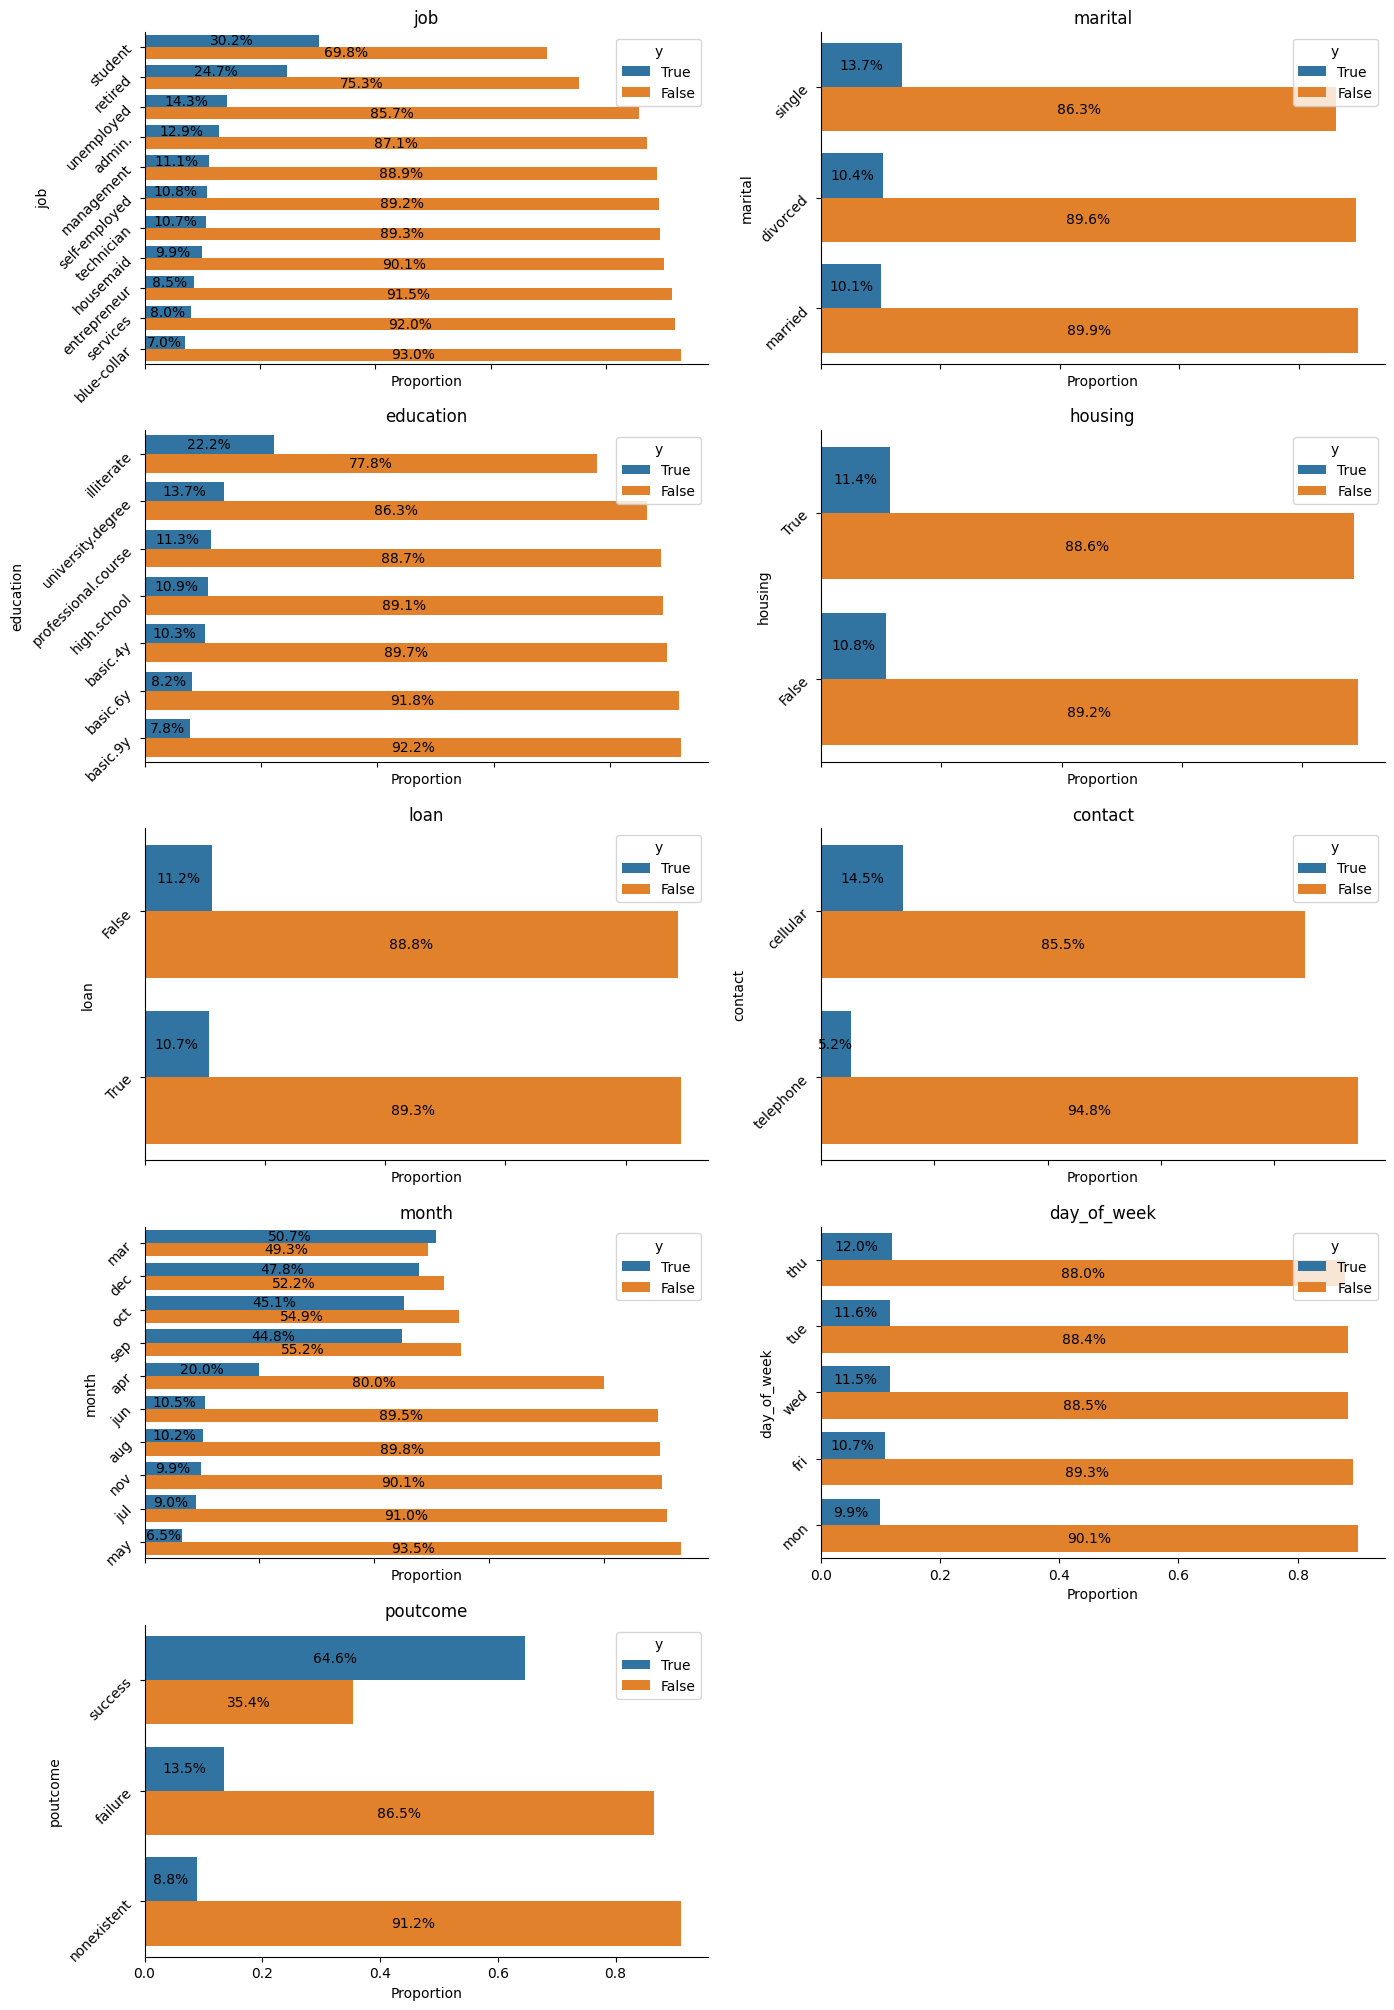

In [14]:
i=1
n_axes = len(df.columns[df.dtypes == "object"]) 
n_rows=np.ceil(n_axes/2).astype(int)
fig = plt.figure(figsize=(16,5*n_rows))
# ax = ax.flatten()
for col in df.columns[df.dtypes == "object"]: 
    ax = plt.subplot(n_rows,2,i)
    s = df.groupby(col)["y"].value_counts(normalize=True)
    s.name = "count"
    data = s.reset_index()
    data.iloc[:, :-1] = data.iloc[:, :-1].astype(str)
    order = data[data["y"] == "True"].sort_values("count", ascending=False)[col].values
    
    sns.barplot(data=data, x="count", y=col, hue="y", hue_order=["True", "False"], ax=ax, order=order)

    # set bar labels for client who subscribed to a term deposit as percentage
    ax.bar_label(ax.containers[0], data[data["y"] == "True"]["count"].sort_values(ascending=False)\
                 .map(lambda x: f"{x:.1%}"), label_type="center")
    # set bar labels for client who didn't subscribed to a term deposit as percentage
    ax.bar_label(ax.containers[1], data[data["y"] == "False"]["count"].sort_values(ascending=True)\
                 .map(lambda x: f"{x:.1%}"), label_type="center")

    ax.tick_params("y", labelrotation=45)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_title(col)
    ax.set_xlabel("Proportion")
    if i+2 <= n_axes:
        [tick.set_visible(False) for tick in ax.get_xticklabels()]
    i+=1
plt.show()

- **Job**: 
  - Student: 30% success rate
  - Retired: 25% success rate

- **Education**: 
  - Illiterate: 22% success rate

- **Contact**: 
  - Cellular: 14.5% success rate
  - Phone: 5.2% success rate

- **Month**: 
  - March: 50.7% success rate
  - December: 47.8% success rate
  - October and September: 45% success rate each

- **Poutcome**: 
  - Success: 64.6%
  - Failure: 13.5%
  - Nonexistent: 8.8%

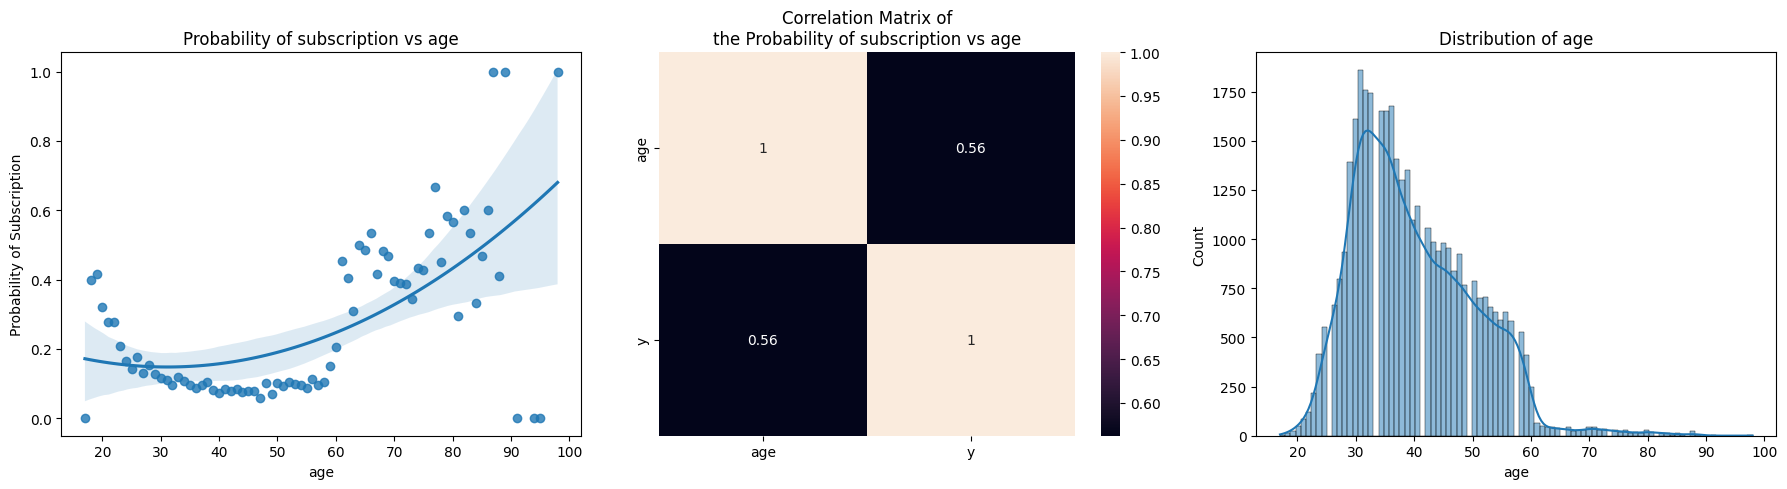

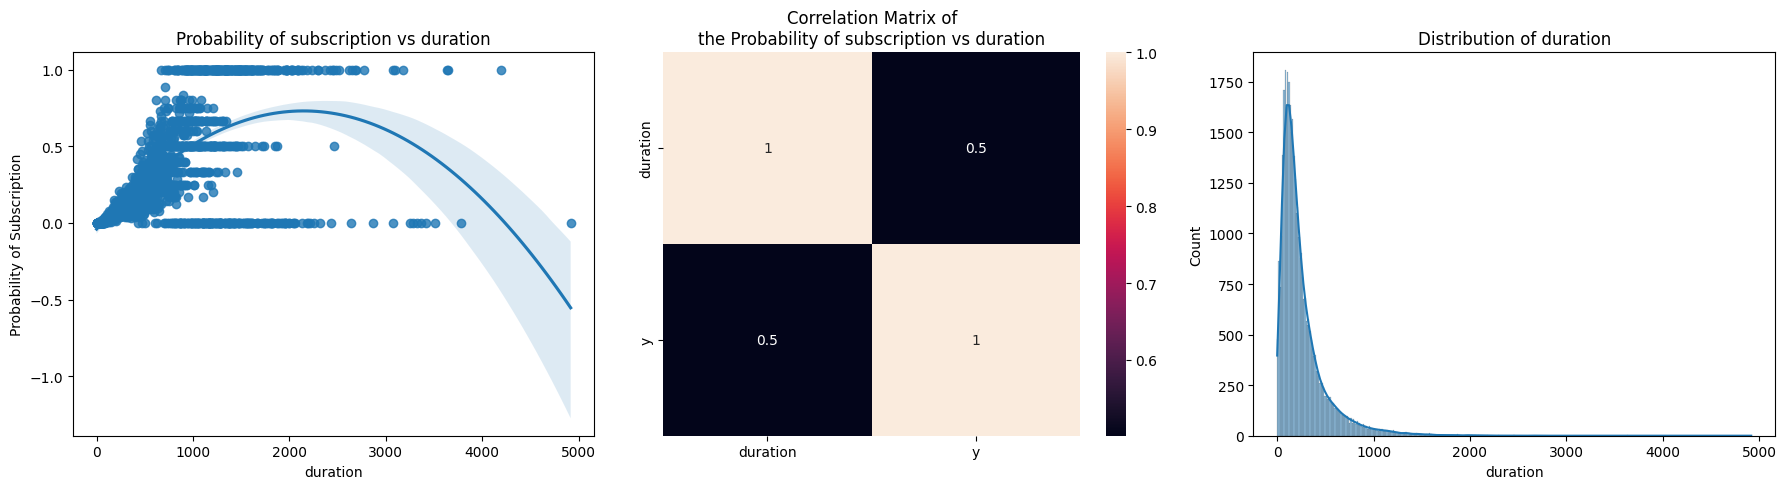

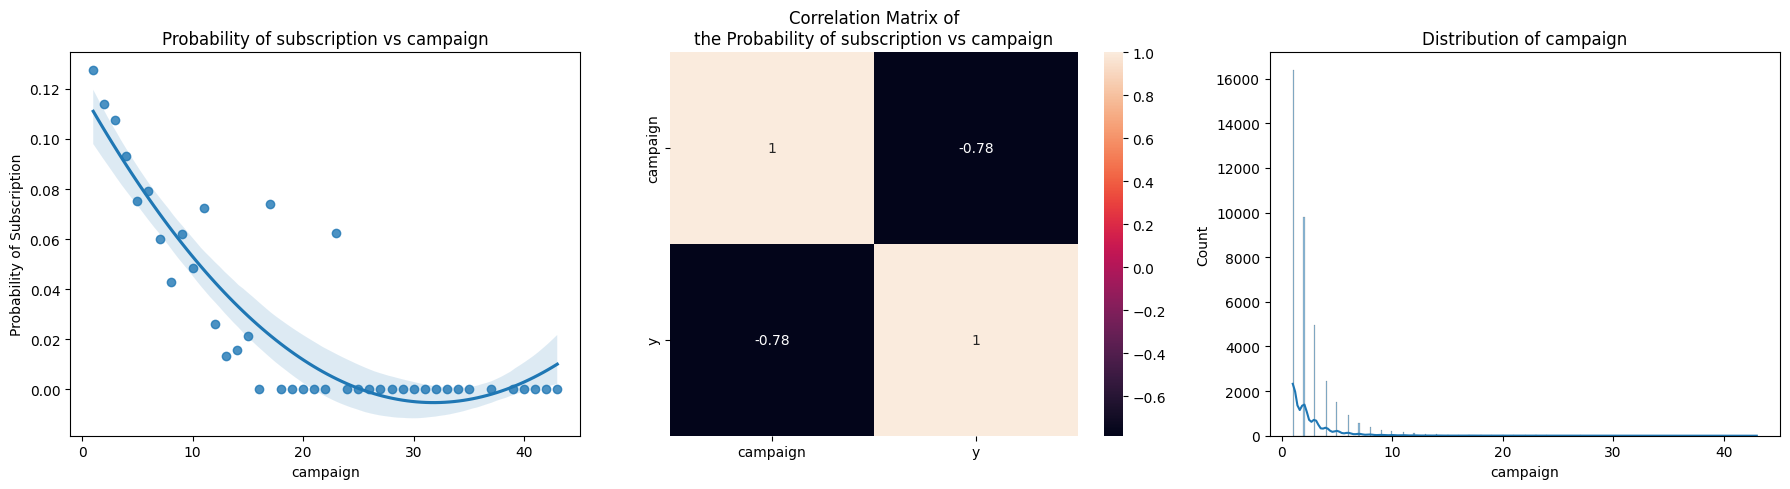

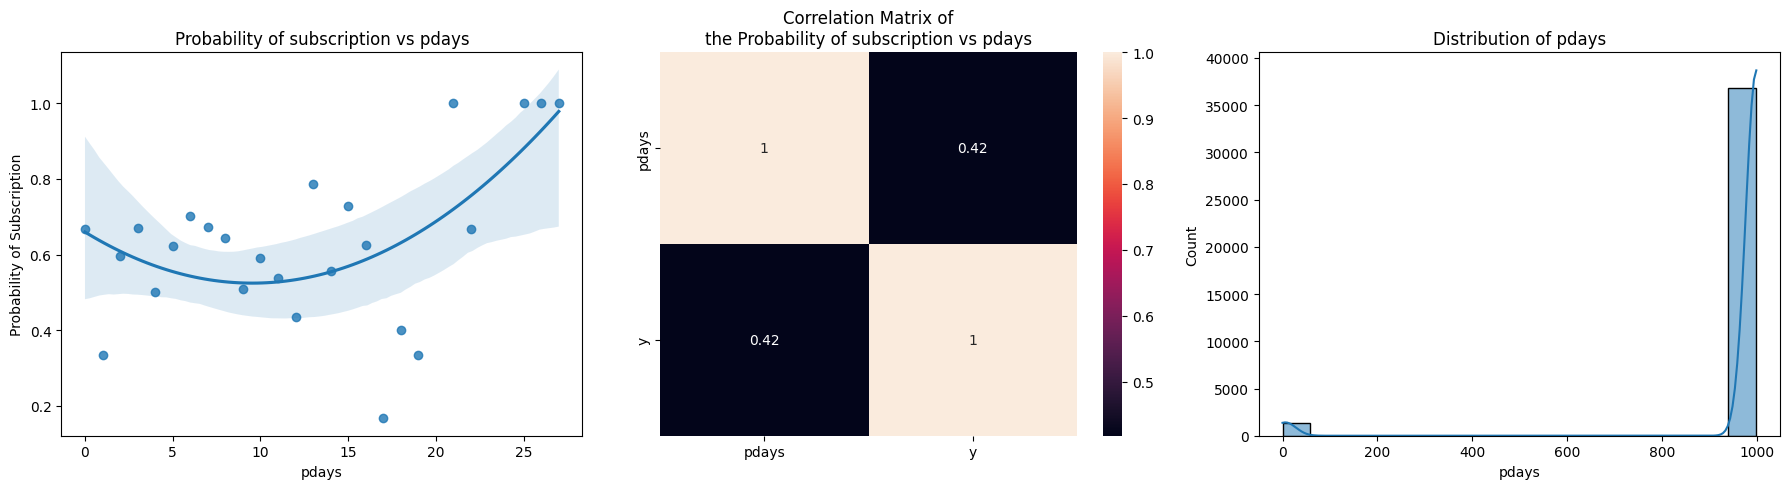

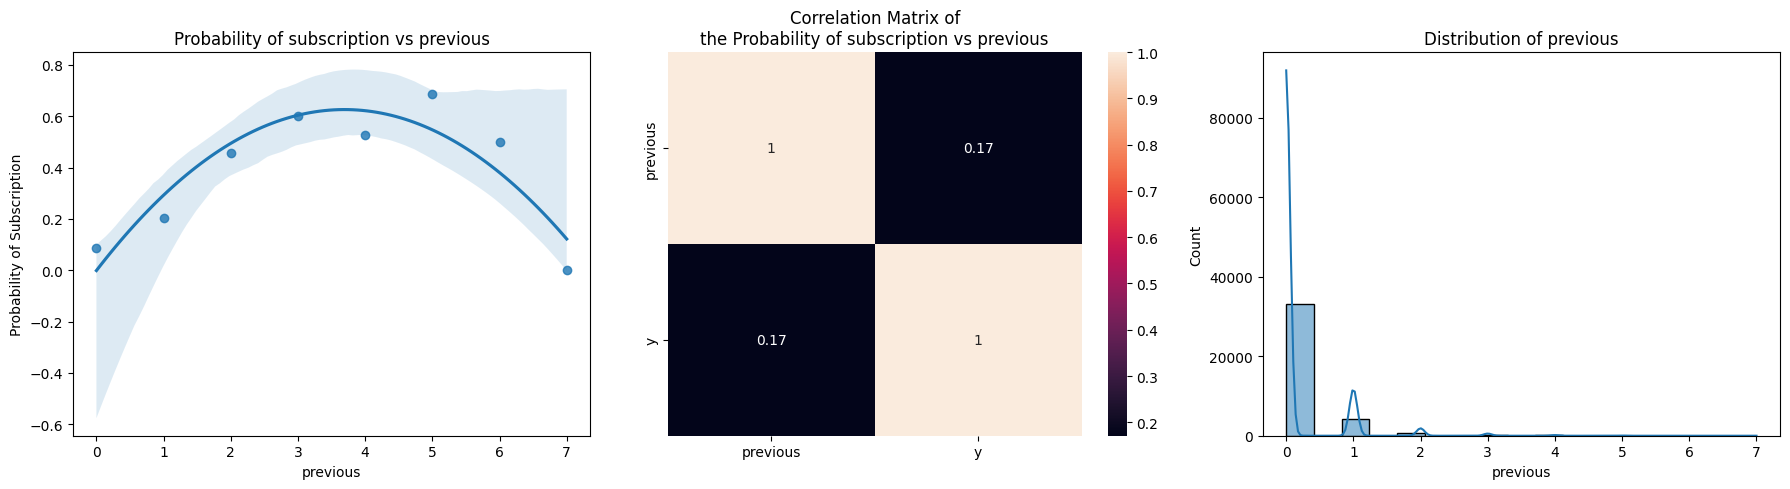

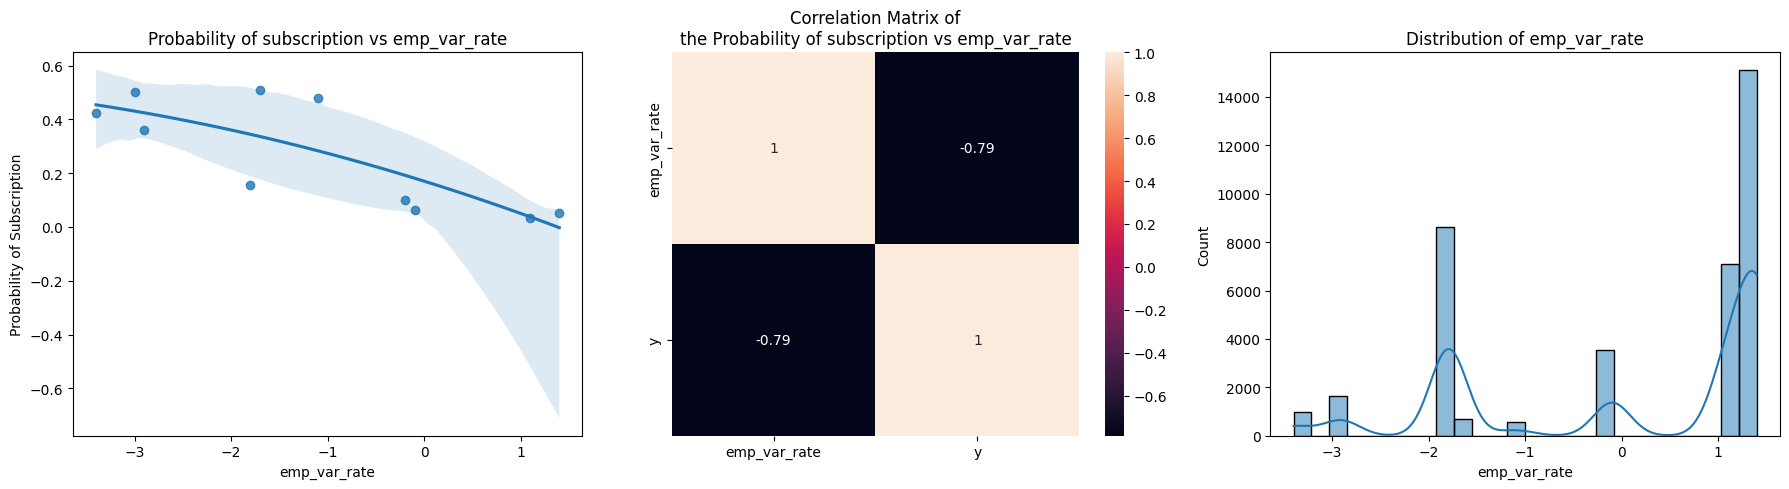

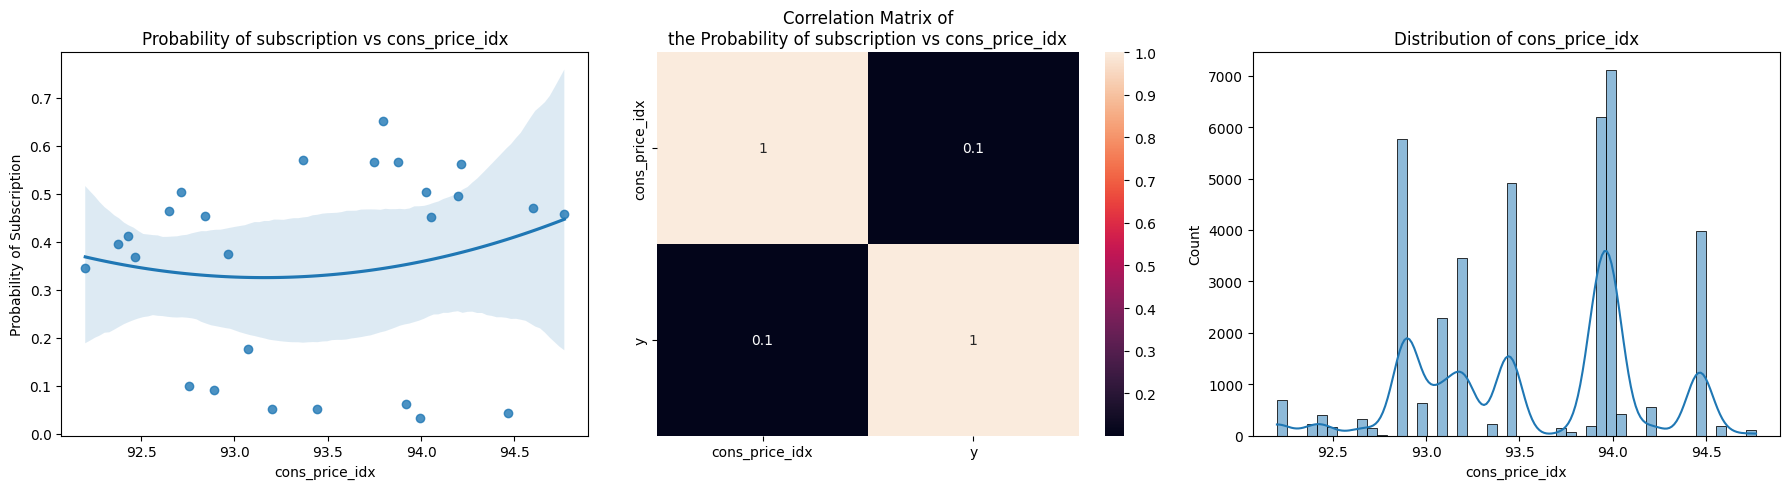

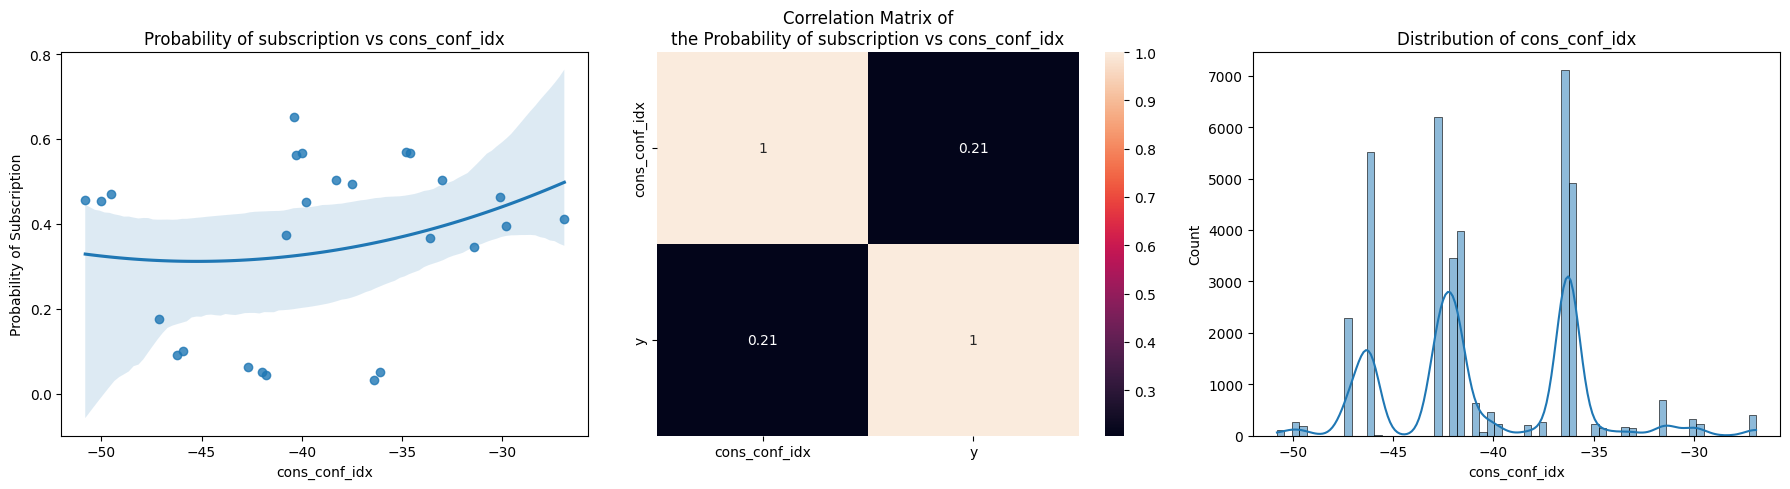

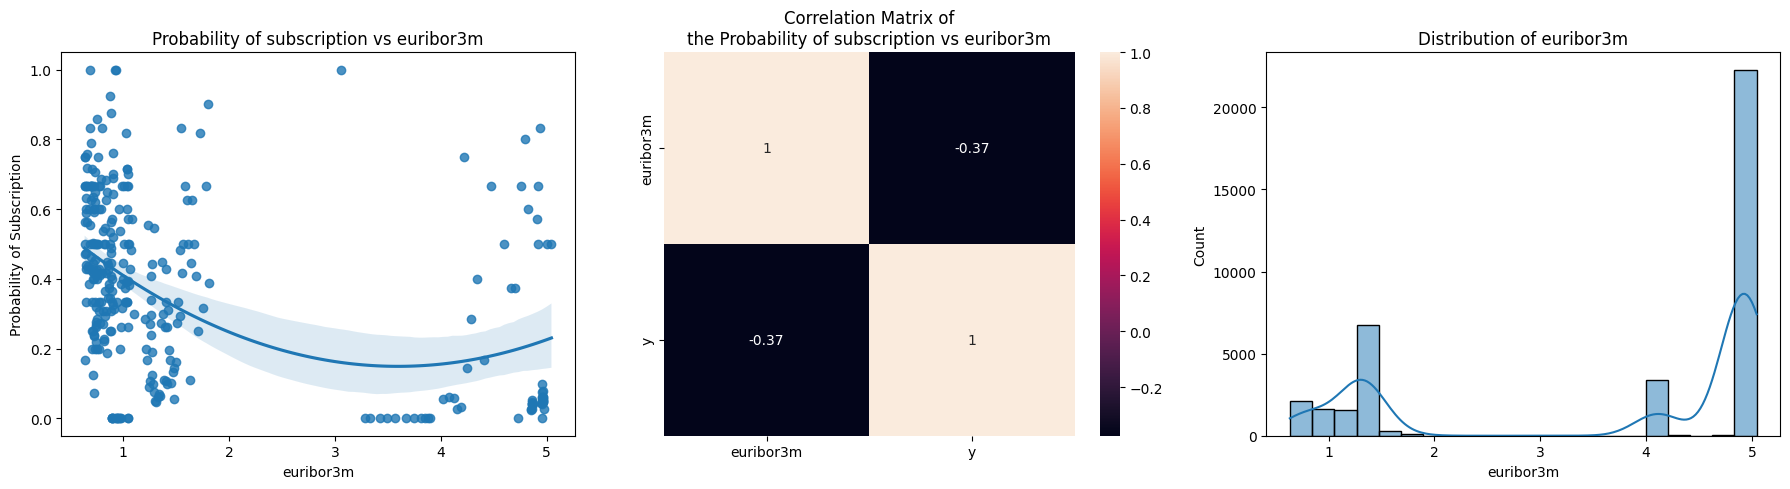

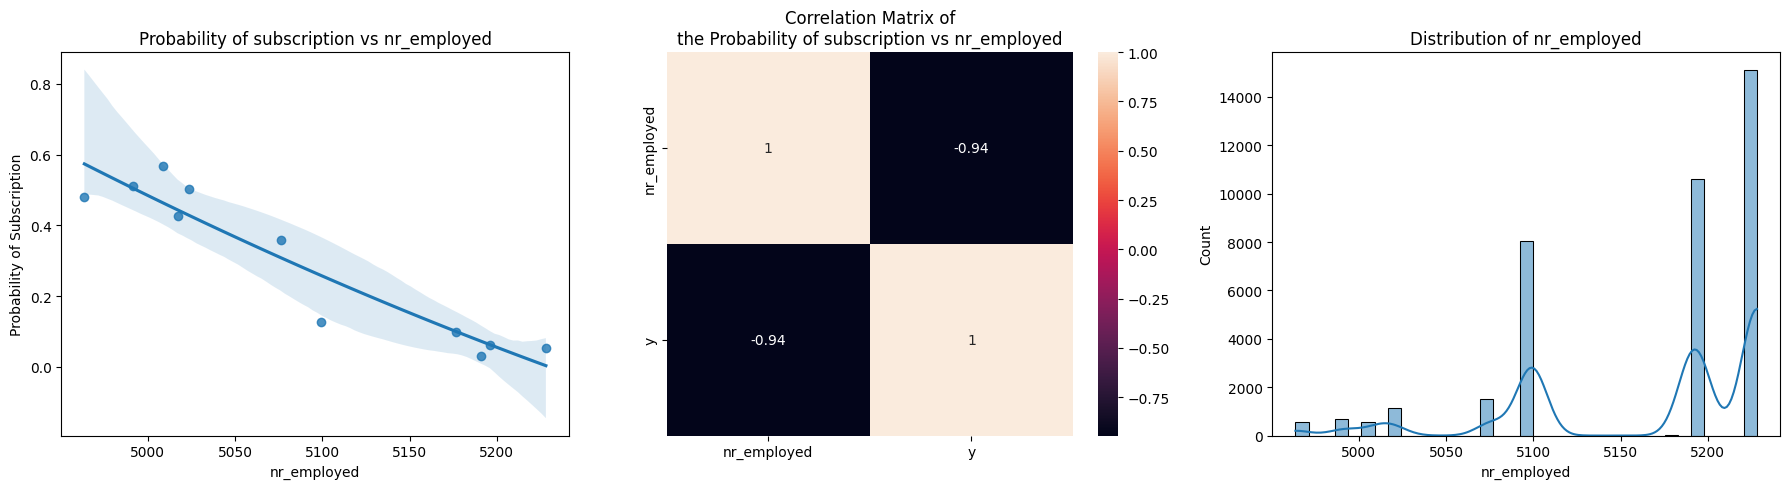

In [15]:
columns = df.columns[df.dtypes != "object"].tolist()
columns.remove("y")
for col in columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,5))
    if col == "pdays":
        data = df[df["pdays"] != 999].groupby(col)["y"].mean().reset_index()
    else:
        data = df.groupby(col)["y"].mean().reset_index()
    sns.regplot(data, x=col, y="y", order=2, ax=ax1)
    ax1.set_title(f"Probability of subscription vs {col}")
    ax1.set_ylabel("Probability of Subscription")
    sns.heatmap(data.corr(), annot=True, ax=ax2)
    ax2.set_title(f"Correlation Matrix of\nthe Probability of subscription vs {col}")
    sns.histplot(df[col], ax=ax3, kde=True)
    ax3.set_title(f"Distribution of {col}")
    fig.tight_layout()
    plt.show()

- `age` 
    1. `age` and the proportion of the response **moderately correlated**
    1. The distribution of `age` is **right skewed**
    >meaning that most individuals are younger, but there is a long tail of older individuals.
- `duration` 
    1. `duration` and the proportion of the response **moderately correlated**
    1. `duration` exhibits **exponential distribution**
    >suggests that most contacts are of short length, with fewer long-duration calls
- `campaign`
    1. `campaign` and the proportion of the response **negatively correlated**
    1. `campaign` exhibits **geometric  distribution**
    >meaning the likelihood of a response decreases as the number of contacts increases.
- `pdays` 
    1. `pdays` and the proportion of the response **moderately correlated**
    1. The distribution of `pdays` suggests that the majority of engagements weren’t preceded by any contact in the previous campaign.
- `previous` 
    1. `previous` and the proportion of the response **weakly correlated**
    1. `previous` exhibits **geometric  distribution**
- `emp_var_rate` 
    1. `emp_var_rate` and the proportion of the response **negatively correlated**
- `cons_price_idx` 
    1. `cons_price_idx` and the proportion of the response **weakly correlated**
- `cons_conf_idx` 
    1. `cons_conf_idx` and the proportion of the response **weaklly correlated**
- `euribor3m`
    1. `euribor3m` and the proportion of the response **moderately correlated**
- `nr_employed` 
    1. `nr_employed` and the proportion of the response **negatively correlated**

>From sight we can initially say taht all distributions are not following normal distribution. This issue will be handled by using sequential robust min-max scaler.

In [16]:
df.select_dtypes(include=["number", "bool"]).corr().loc[:, ["y"]].sort_values("y", ascending=False).drop("y")

,y
duration,0.405856
previous,0.221178
cons_conf_idx,0.051363
age,0.030123
campaign,-0.065125
cons_price_idx,-0.133000
emp_var_rate,-0.292209
euribor3m,-0.300540
pdays,-0.319386
nr_employed,-0.347816


- `age` and response **weakly correlated**
- `duration` and response **moderately correlated**
- `campaign` and response **negatively weakly correlated**
- `pdays` and response **-ve moderately correlated**
- `previous` and response **weakly correlated**
- `emp_var_rate` and response **-ve moderately correlated**
- `cons_price_idx` and response **-ve weakly correlated**
- `cons_conf_idx` and response **weaklly correlated**
- `euribor3m` and response **-ve moderately correlated**
- `nr_employed` and response **-ve moderately correlated**

#### conclusions
- **Demographic Factors:** 
    - Students, Retired, and Unemployed: These groups have a higher likelihood of subscribing to a term deposit compared to others. This could be due to different financial stability or investment interests.
- **Age Factor:** 
    - Individuals at both ends of the age spectrum are more likely to subscribe. This might reflect different financial priorities or investment strategies among younger and older people.
- **Communication Channel:** 
    - Reaching out to clients via cellular communication increases the likelihood of subscription. This suggests that personal and direct communication might be more effective than other methods.
- **Seasonal Trends:** 
    - Subscription rates fluctuate depending on the month, possibly due to economic conditions or financial behaviors that vary throughout the year.
- **Previous Campaign Interactions:** 
    - People who were contacted in previous campaigns are more likely to subscribe. Furthermore, those who had successful outcomes in prior campaigns are even more likely to subscribe. This implies that past engagement and success can positively influence future decisions.
- **Frequency of Contact:** 
    - Contacting individuals multiple times within the same campaign increases subscription rates, but there’s a limit to its effectiveness (about 25 contacts). This suggests that while persistence can be beneficial, there’s a diminishing return after a certain point.

## Feature Engineering

### Variables with Potential Spurious Correlations:

- **Duration of Contact**: It is not known before contact
- **Month**: Could reflect seasonal or economic effects rather than individual customer behavior.
- **Day of the Week**: May show operational patterns, not true customer preferences.
- **Contact Method (Telephone vs. Cellular)**: Might be influenced by demographic factors.
- **Job Category**: Could be a proxy for socioeconomic status rather than a direct influence.
- **Education Level**: Could be a proxy for financial literacy or product accessibility.
- **Housing/Personal Loans**: Might indicate financial conditions rather than the likelihood of subscription.

### Variables with Strong Potential for Spurious Associations:

1. **`duration`**
1. **`month`**
1. **`day_of_week`**
                                    
- I decided to remove these three variables to avoid spurious correlations and improve model reliability.

In [17]:
df_cleaned = df.copy().drop(["duration", "month", "day_of_week"], axis=1)

In [20]:
df_cleaned["education_job"] = df_cleaned["education"] + "_" + df_cleaned["job"]
df_cleaned.drop(["education", "job"], axis=1, inplace=True)

In [21]:
onehot_cols = df_cleaned.dtypes[df_cleaned.dtypes=="object"].index.to_list()
label_cols = ["y"]
df_cleaned = pd.get_dummies(df_cleaned, columns=onehot_cols, drop_first=True)
df_cleaned[label_cols] = df[label_cols].astype(np.uint8)

In [22]:
df_cleaned.head()

,age,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,marital_married,marital_single,housing_True,loan_True,contact_telephone,poutcome_nonexistent,poutcome_success,education_job_basic.4y_blue-collar,education_job_basic.4y_entrepreneur,education_job_basic.4y_housemaid,education_job_basic.4y_management,education_job_basic.4y_retired,education_job_basic.4y_self-employed,education_job_basic.4y_services,education_job_basic.4y_student,education_job_basic.4y_technician,education_job_basic.4y_unemployed,education_job_basic.6y_admin.,education_job_basic.6y_blue-collar,education_job_basic.6y_entrepreneur,education_job_basic.6y_housemaid,education_job_basic.6y_management,education_job_basic.6y_retired,education_job_basic.6y_self-employed,education_job_basic.6y_services,education_job_basic.6y_student,education_job_basic.6y_technician,education_job_basic.6y_unemployed,education_job_basic.9y_admin.,education_job_basic.9y_blue-collar,education_job_basic.9y_entrepreneur,education_job_basic.9y_housemaid,education_job_basic.9y_management,education_job_basic.9y_retired,education_job_basic.9y_self-employed,education_job_basic.9y_services,education_job_basic.9y_student,education_job_basic.9y_technician,education_job_basic.9y_unemployed,education_job_high.school_admin.,education_job_high.school_blue-collar,education_job_high.school_entrepreneur,education_job_high.school_housemaid,education_job_high.school_management,education_job_high.school_retired,education_job_high.school_self-employed,education_job_high.school_services,education_job_high.school_student,education_job_high.school_technician,education_job_high.school_unemployed,education_job_illiterate_admin.,education_job_illiterate_blue-collar,education_job_illiterate_entrepreneur,education_job_illiterate_housemaid,education_job_illiterate_retired,education_job_illiterate_self-employed,education_job_professional.course_admin.,education_job_professional.course_blue-collar,education_job_professional.course_entrepreneur,education_job_professional.course_housemaid,education_job_professional.course_management,education_job_professional.course_retired,education_job_professional.course_self-employed,education_job_professional.course_services,education_job_professional.course_student,education_job_professional.course_technician,education_job_professional.course_unemployed,education_job_university.degree_admin.,education_job_university.degree_blue-collar,education_job_university.degree_entrepreneur,education_job_university.degree_housemaid,education_job_university.degree_management,education_job_university.degree_retired,education_job_university.degree_self-employed,education_job_university.degree_services,education_job_university.degree_student,education_job_university.degree_technician,education_job_university.degree_unemployed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


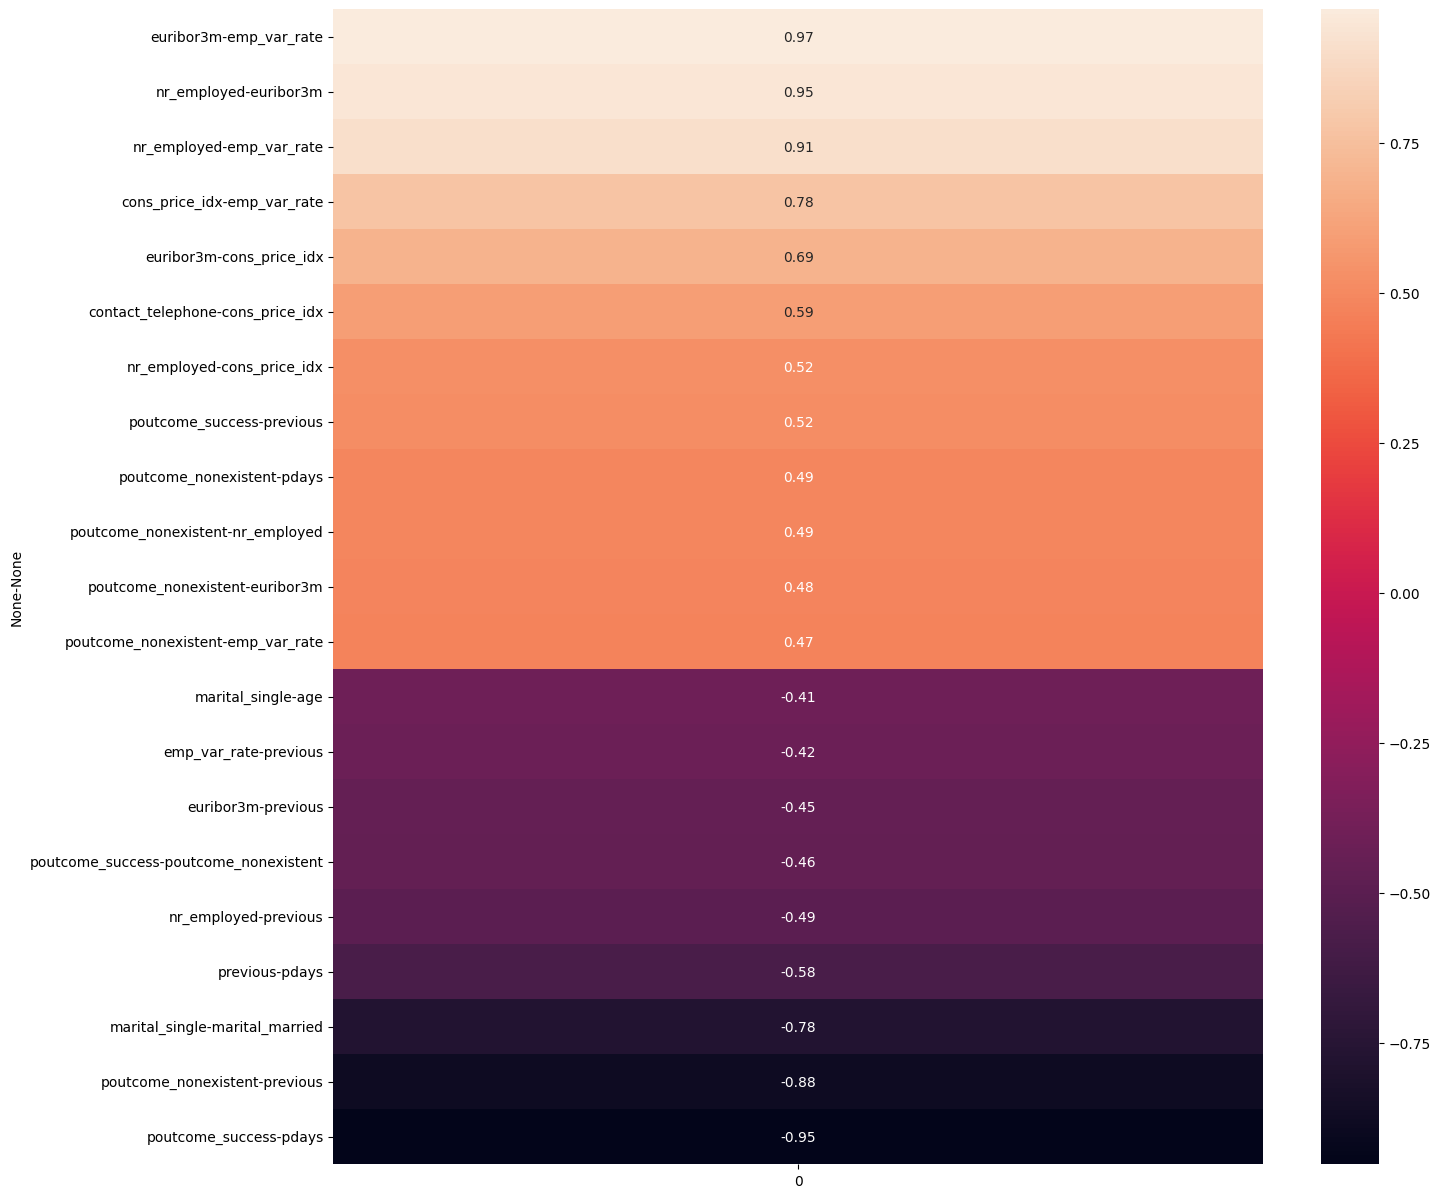

In [23]:
corr_matrix = df_cleaned.corr().drop("y", axis=1)
corr_matrix = corr_matrix[:][(corr_matrix >= .4)|(corr_matrix <= -.4)]
corr_matrix = corr_matrix.dropna(how="all").dropna(how="all", axis=1)
shape = corr_matrix.values.shape[0]
indices = [[True if j < i else False for j in range(shape)] for i in range(shape)]
corr_matrix = corr_matrix[pd.DataFrame(indices, index=corr_matrix.index, columns=corr_matrix.columns)]

fig, ax = plt.subplots(figsize=(15,15))
vmax=corr_matrix.max().max()
vmin=corr_matrix.min().min()
sns.heatmap(corr_matrix.stack().sort_values(ascending=False).to_frame(), vmax=vmax, vmin=vmin, ax=ax, annot=True)
plt.show()

In [24]:
corr_matrix.stack().sort_values(ascending=False).to_frame()

0
euribor3m            emp_var_rate          0.972421
nr_employed          euribor3m             0.945328
                     emp_var_rate          0.907898
cons_price_idx       emp_var_rate          0.775385
euribor3m            cons_price_idx        0.689554
contact_telephone    cons_price_idx        0.592909
nr_employed          cons_price_idx        0.524188
poutcome_success     previous              0.519892
poutcome_nonexistent pdays                 0.486286
                     nr_employed           0.485282
                     euribor3m             0.482562
                     emp_var_rate          0.468716
marital_single       age                  -0.408988
emp_var_rate         previous             -0.419750
euribor3m            previous             -0.450753
poutcome_success     poutcome_nonexistent -0.463107
nr_employed          previous             -0.494700
previous             pdays                -0.581296
marital_single       marital_married      -0.776228
poutcome_nonexistent previous             -0.881786
poutcome_success     pdays                -0.952692

1. **`emp_var_rate`** has high correlations with:
    - `euribor3m` (0.972)
    - `nr_employed` (0.908)

1. **`euribor3m`** has a high correlation with:
    - `nr_employed` (0.945)

1. **`poutcome_nonexistent`** has a strong negative correlation with:
    - `previous` (-0.882)


### Actions:
1. **Feature Reduction**: Dropping `poutcome_nonexistent`.

1. **Feature Engineering**: Create new features that capture underlying information without redundancy. For example, combining `emp_var_rate`, `euribor3m`, and `nr_employed` into a single composite index might be useful.
   > It was found to negatively impact model performance, so this approach was discarded.

In [25]:
cloumns_to_drop = ["poutcome_nonexistent"]
df_cleaned.drop(cloumns_to_drop, axis=1, inplace=True, errors="ignore")

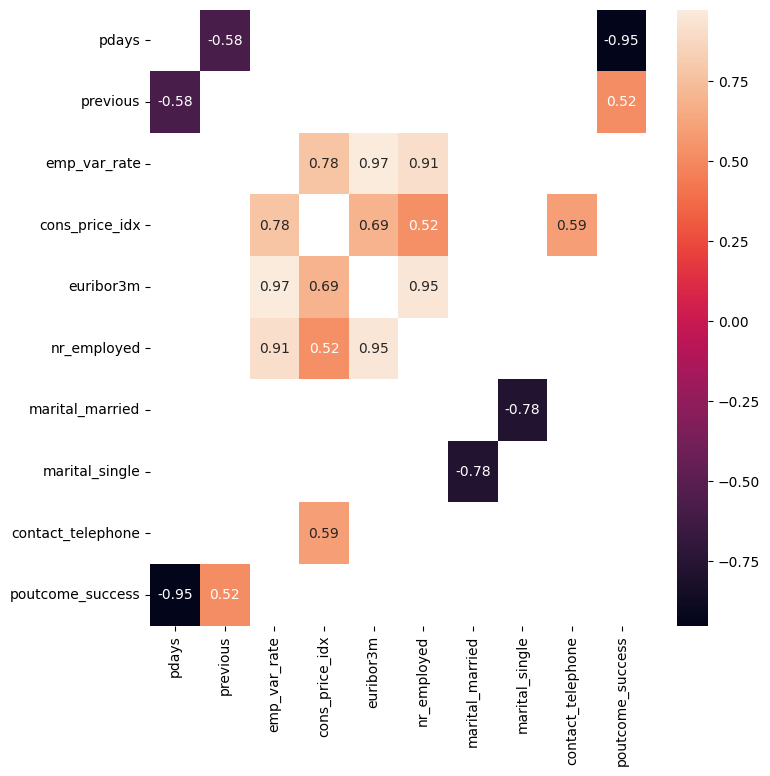

In [26]:
corr_matrix = df_cleaned.corr().drop("y", axis=1)
corr_matrix = corr_matrix[:][corr_matrix != 1]
corr_matrix = corr_matrix[:][(corr_matrix >= .5)|(corr_matrix <= -.5)]
corr_matrix = corr_matrix.dropna(how="all").dropna(how="all", axis=1)
fig, ax = plt.subplots(figsize=(8,8))
vmax=corr_matrix.max().max()
vmin=corr_matrix.min().min()
sns.heatmap(corr_matrix, vmax=vmax, vmin=vmin, ax=ax, annot=True)
plt.show()

### Feature Scaling

In [27]:
(normaltest(df_cleaned).pvalue <= .05)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

- Since the p-values from the normality tests indicate that none of the features follow a normal distribution (i.e., all p-values are ≤ 0.05), I have decided to use Robust min-max scaling.

In [28]:
robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()
def scaler(data):
    data = robust_scaler.fit_transform(data)
    data = minmax_scaler.fit_transform(data)
    return data


In [29]:
df_cleaned[:] = scaler(df_cleaned)

In [30]:
## discarded
# pca = PCA(n_components=1)
# df_cleaned["composite_feature"] = scaler(pca.fit_transform(df_cleaned[["emp_var_rate", "euribor3m", "nr_employed"]])).flatten()

# df_cleaned.drop(["emp_var_rate", "euribor3m", "nr_employed"], axis=1, inplace=True, errors="ignore")

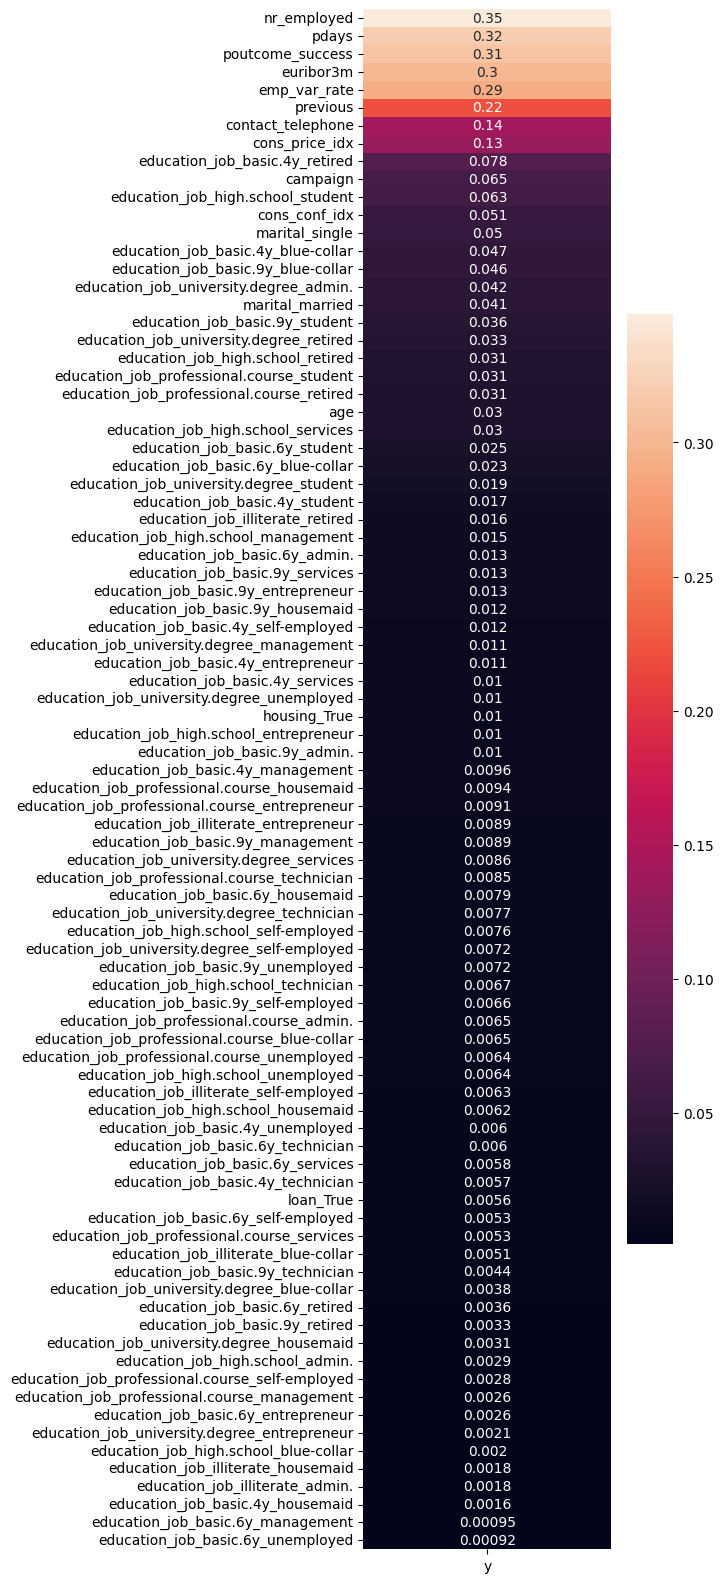

In [31]:
corr_y = df_cleaned.corr().drop("y")["y"].abs().sort_values(ascending=False)
vmax = corr_y.max()
vmin = corr_y.min()
plt.figure(figsize=(4,20))
sns.heatmap(corr_y.to_frame(), annot=True, vmax=vmax, vmin=vmin)
plt.show()

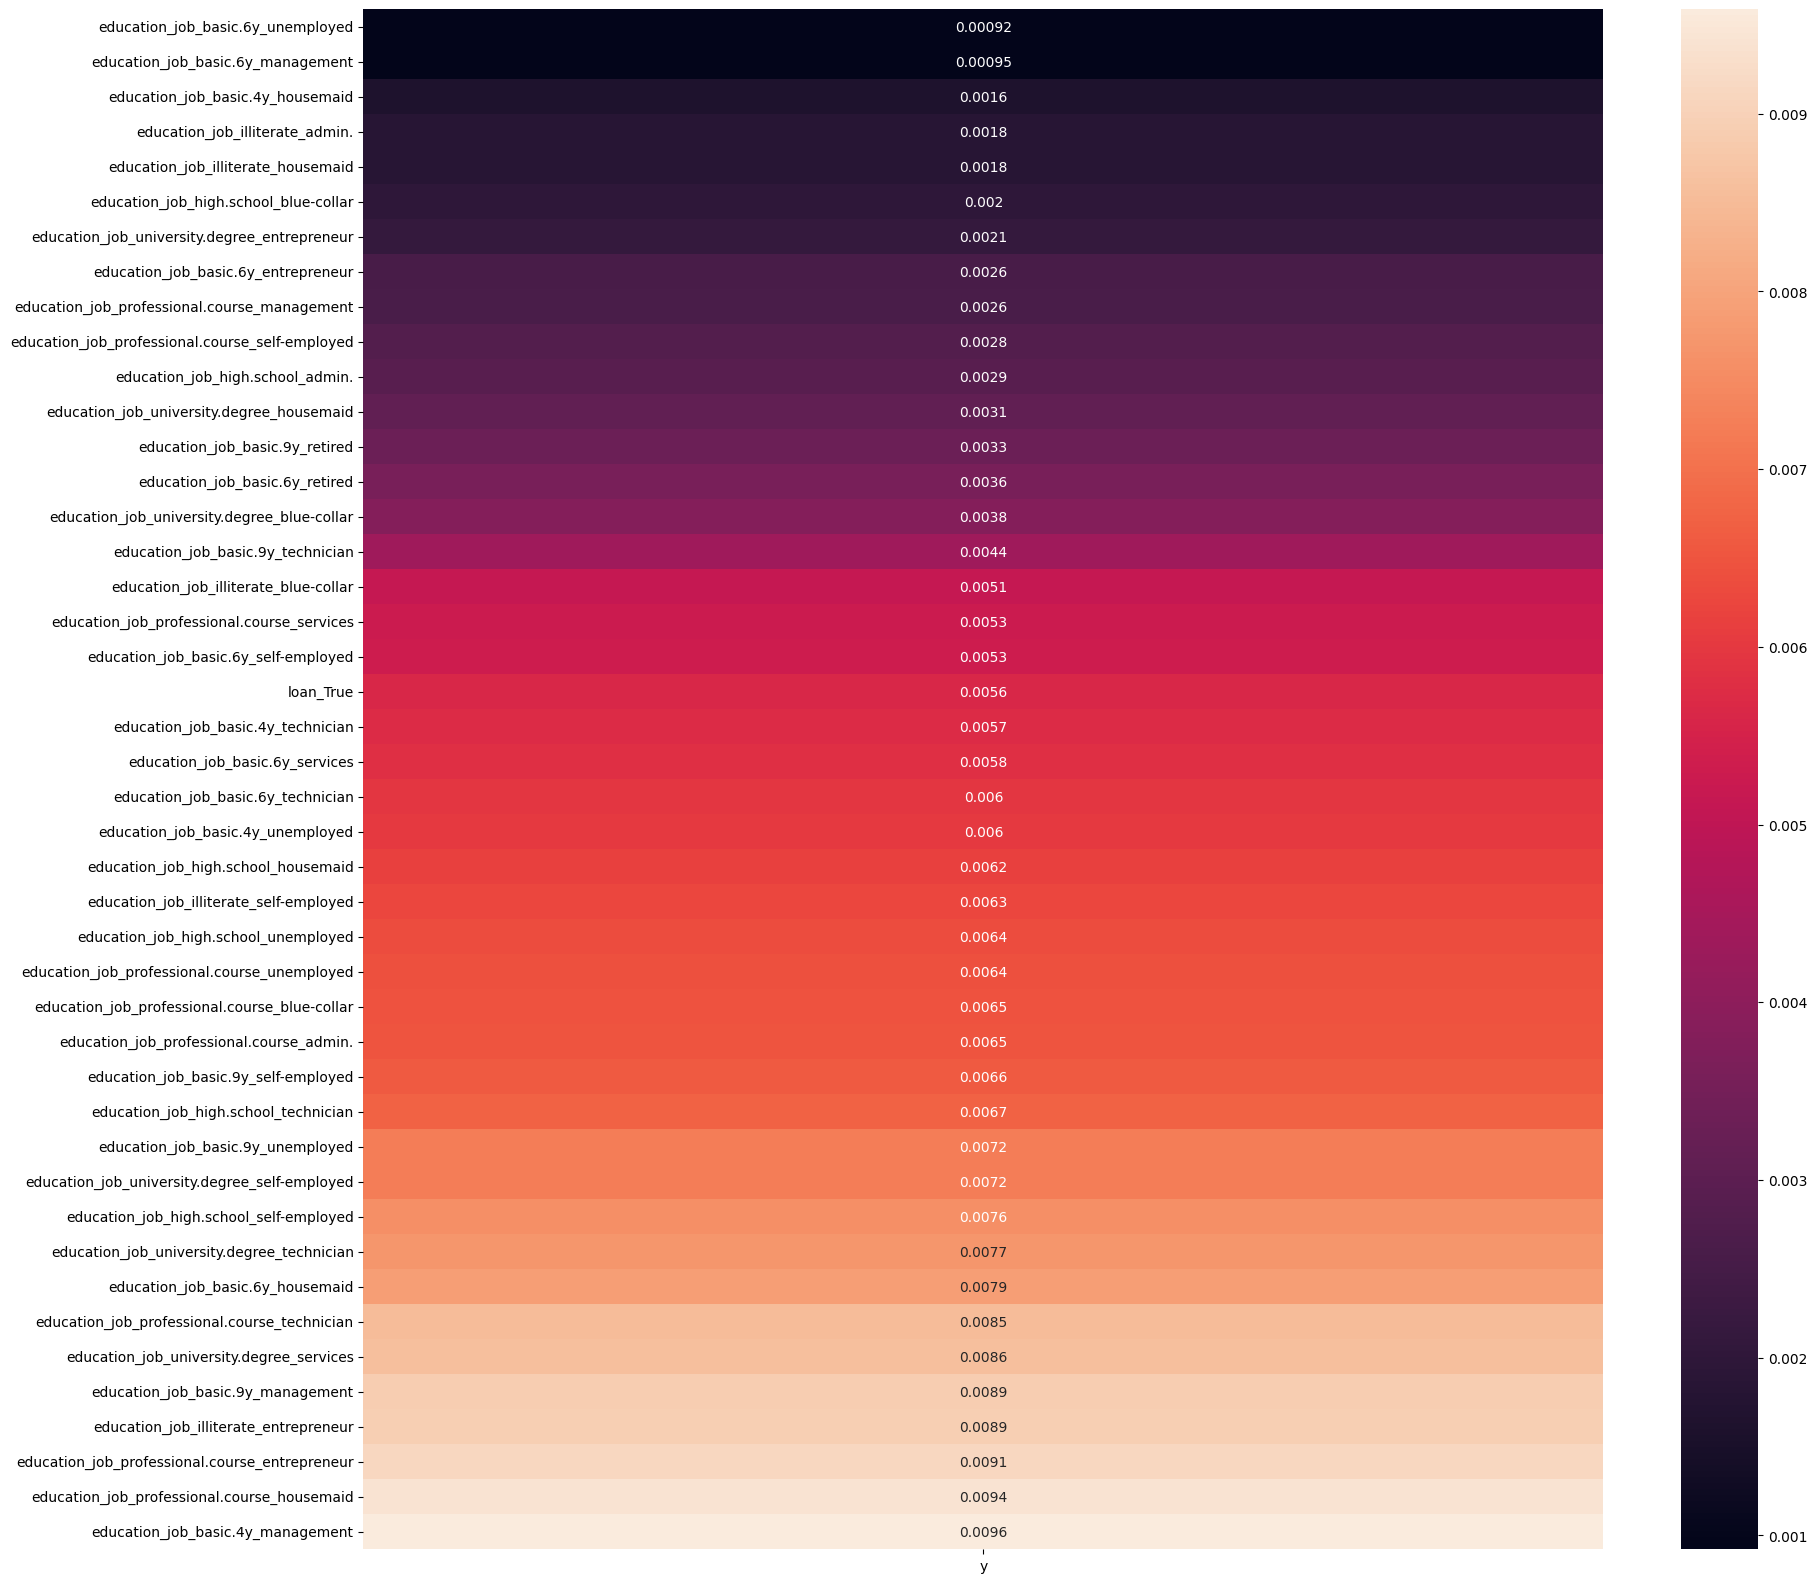

In [32]:
corr_y = df_cleaned.corr().abs()
corr_y = corr_y[corr_y < .01]
corr_y.dropna(how="all", inplace=True)
corr_y.dropna(how="all", axis=1, inplace=True)
corr_y = corr_y[["y"]].sort_values("y").dropna()
vmax = corr_y.max().max()
vmin = corr_y.min().min()
plt.figure(figsize=(20,20))
sns.heatmap(corr_y, annot=True, vmax=vmax, vmin=vmin)
plt.show()

In [33]:
df_cleaned.drop(corr_y.index, axis=1, inplace=True)

## Model building

In [34]:
df_cleaned.drop(["cluster","y"], axis=1, errors="ignore", inplace=True)

input_dim = df_cleaned.shape[1],
encoding_dim = 200

input_layer = Input(shape=input_dim)
encoded = Dense(encoding_dim, activation="relu")(input_layer)
encoded = Dense(encoding_dim // 2, activation="relu")(encoded)
encoded = Dense(encoding_dim // 3, activation="relu")(encoded)
encoded = Dense(encoding_dim // 6, activation="relu")(encoded)
encoded = Dense(encoding_dim // 12, activation="relu")(encoded)

encoded = Dense(encoding_dim // 25, activation="relu")(encoded)

decoded = Dense(encoding_dim // 12, activation="relu")(encoded)
decoded = Dense(encoding_dim // 6, activation="relu")(decoded)
decoded = Dense(encoding_dim // 3, activation="relu")(decoded)
decoded = Dense(encoding_dim // 2, activation="relu")(decoded)
decoded = Dense(encoding_dim, activation="relu")(decoded)
decoded = Dense(input_dim[0], activation="sigmoid")(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

optimizer = Adam(learning_rate=0.0001) 
autoencoder.compile(optimizer=optimizer, loss="binary_crossentropy")

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 42)]              0         
_________________________________________________________________
dense (Dense)                (None, 200)               8600      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 66)                6666      
_________________________________________________________________
dense_3 (Dense)              (None, 33)                2211      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 136   

In [35]:
df_cleaned.drop("cluster", axis=1, errors="ignore", inplace=True)

early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True, mode="min")

batch_size = 256
epochs = 1000
tf.random.set_seed(42)
history = autoencoder.fit(df_cleaned, df_cleaned,
                          epochs=epochs, 
                          batch_size=batch_size, 
                          shuffle=True, 
                          validation_split=0.3,
                          callbacks=[early_stopping])

Epoch 1/1000
105/105 [==============================] - 7s 26ms/step - loss: 0.5983 - val_loss: 0.4047
Epoch 2/1000
105/105 [==============================] - 1s 13ms/step - loss: 0.2017 - val_loss: 0.3214
Epoch 3/1000
105/105 [==============================] - 1s 13ms/step - loss: 0.1866 - val_loss: 0.3167
Epoch 4/1000
105/105 [==============================] - 2s 18ms/step - loss: 0.1850 - val_loss: 0.3102
Epoch 5/1000
105/105 [==============================] - 2s 17ms/step - loss: 0.1832 - val_loss: 0.3084
Epoch 6/1000
105/105 [==============================] - 2s 16ms/step - loss: 0.1809 - val_loss: 0.3098
Epoch 7/1000
105/105 [==============================] - 1s 14ms/step - loss: 0.1722 - val_loss: 0.2901
Epoch 8/1000
105/105 [==============================] - 1s 13ms/step - loss: 0.1538 - val_loss: 0.2805
Epoch 9/1000
105/105 [==============================] - 1s 12ms/step - loss: 0.1424 - val_loss: 0.2675
Epoch 10/1000
105/105 [==============================] - 1s 13ms/step - l

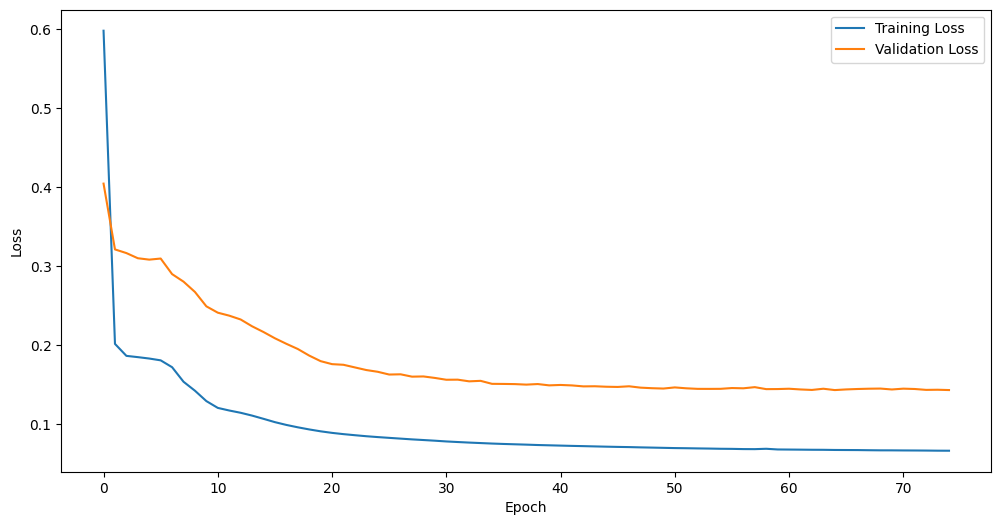

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

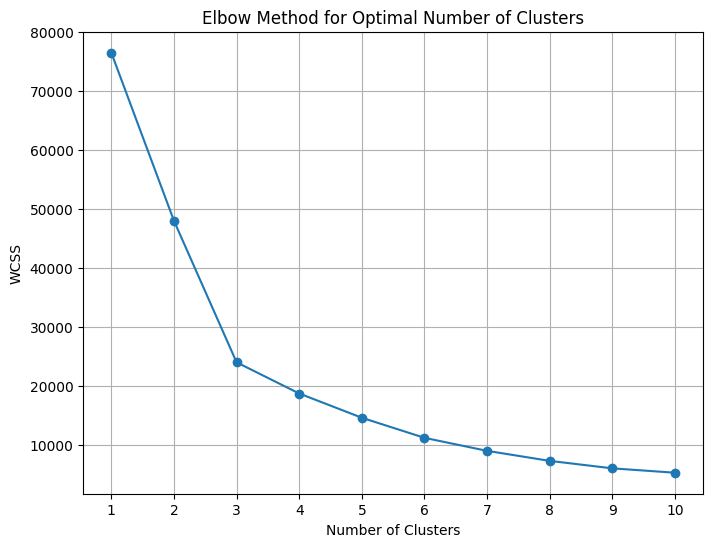

In [37]:
df_cleaned.drop(["cluster","y", "duration"], axis=1, errors="ignore", inplace=True)
encoded_data = encoder.predict(df_cleaned)
encoded_data = scaler(encoded_data)
pca = PCA(n_components=2, random_state=42, whiten=True)
encoded_data_pca = pca.fit_transform(encoded_data)

cluster_range = range(1, 11) 
wcss = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, init="k-means++", n_init=10)
    kmeans.fit(encoded_data_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, wcss, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal Number of Clusters")
plt.gca().set_xticks(cluster_range, cluster_range)
plt.grid(True)
plt.show()

In [38]:
pca = PCA(n_components=2, random_state=42, whiten=True)
encoded_data_pca = pca.fit_transform(encoded_data)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10) 
clusters = kmeans.fit_predict(encoded_data_pca)

df_cleaned["cluster"] = clusters

df_viz = pd.DataFrame(encoded_data_pca, columns=["PC1", "PC2"])
df_viz["cluster"] = clusters

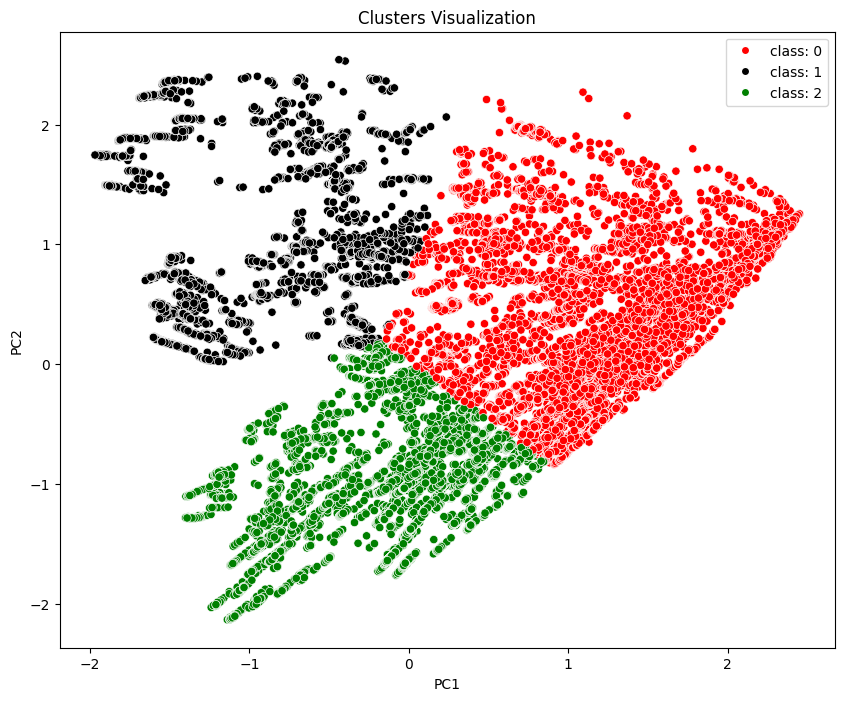

In [49]:
handles = [Line2D([0], [0], markerfacecolor="r", lw=0, label="class: 0", marker="o", color="w"),
           Line2D([0], [0], markerfacecolor="k", lw=0, label="class: 1", marker="o", color="w"),
           Line2D([0], [0], markerfacecolor="g", lw=0, label="class: 2", marker="o", color="w")
          ]

plt.figure(figsize=(10, 8))
labels = ["red", "black", "green"]
colors = pd.cut(df_viz["cluster"], bins=[-.01,0,1,2], labels=labels)
sns.scatterplot(data=df_viz, x="PC1", y="PC2", c=colors)
plt.title("Clusters Visualization")
plt.legend(handles=handles)
plt.show()

In [48]:
# Evaluate clustering
silhouette_avg = silhouette_score(encoded_data_pca, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.47355520725250244


Silhouette Score: suggests that your clusters are **moderately separated**

In [41]:
df_cleaned[["y", "duration"]] = df[["y", "duration"]]
y_true = df_cleaned["y"]
clusters = df_cleaned["cluster"]
crosstab = pd.crosstab(y_true, clusters)
display((crosstab.T/ crosstab.values.sum(axis=1)).T)

purity = np.amax(crosstab.values, axis=0).sum() / crosstab.sum().sum()

print(f"Cluster Purity: {purity:.4f}")

cluster,0,1,2
y,,,
False,0.337277,0.278764,0.383959
True,0.711064,0.105238,0.183697


Cluster Purity: 0.8887


In [42]:
df_cleaned.groupby("cluster").agg(["mean", "median", "std"])

age                      campaign                        pdays  \
             mean    median       std      mean   median       std      mean   
cluster                                                                        
0        0.289336  0.259259  0.147990  0.026689  0.02381  0.043233  0.906334   
1        0.303416  0.296296  0.110042  0.043003  0.02381  0.075864  0.999900   
2        0.259573  0.234568  0.109969  0.044352  0.02381  0.075703  1.000000   

                          previous                  emp_var_rate            \
        median       std      mean median       std         mean    median   
cluster                                                                      
0          1.0  0.290415  0.060206    0.0  0.100467     0.377731  0.333333   
1          1.0  0.009980  0.001858    0.0  0.017292     0.939602  1.000000   
2          1.0  0.000000  0.002769    0.0  0.020789     0.936527  1.000000   

                  cons_price_idx                     cons_conf_idx            \
              std           mean    median       std          mean    median   
cluster                                                                        
0        0.232465       0.341346  0.269680  0.187531      0.346957  0.192469   
1        0.134114       0.693088  0.698753  0.146470      0.490692  0.602510   
2        0.143581       0.620773  0.669135  0.150677      0.471295  0.376569   

                  euribor3m                     nr_employed            \
              std      mean    median       std        mean    median   
cluster                                                                 
0        0.242141  0.259956  0.150759  0.291139    0.510931  0.512287   
1        0.130989  0.935194  0.958966  0.155279    0.915782  1.000000   
2        0.134699  0.930596  0.980957  0.158064    0.938573  1.000000   

                  marital_married                  marital_single         \
              std            mean median       std           mean median   
cluster                                                                    
0        0.241672        0.597266    1.0  0.490465       0.290142    0.0   
1        0.124772        0.996471    1.0  0.059300       0.000000    0.0   
2        0.131128        0.335503    0.0  0.472183       0.473928    0.0   

                  housing_True                  contact_telephone         \
              std         mean median       std              mean median   
cluster                                                                    
0        0.453844     0.570689    1.0  0.494995          0.041833    0.0   
1        0.000000     0.433310    0.0  0.495557          0.764896    1.0   
2        0.499338     0.579084    1.0  0.493724          0.405583    0.0   

                  poutcome_success                   \
              std             mean median       std   
cluster                                               
0        0.200215         0.085807    0.0  0.280088   
1        0.424085         0.000000    0.0  0.000000   
2        0.491022         0.000000    0.0  0.000000   

        education_job_basic.4y_blue-collar                   \
                                      mean median       std   
cluster                                                       
0                                 0.043352    0.0  0.203656   
1                                 0.130558    0.0  0.336933   
2                                 0.023794    0.0  0.152412   

        education_job_basic.4y_entrepreneur                   \
                                       mean median       std   
cluster                                                        
0                                  0.005315    0.0  0.072716   
1                                  0.005444    0.0  0.073587   
2                                  0.000072    0.0  0.008504   

        education_job_basic.4y_retired                   \
                                  mean median       std   
cluster          

In [43]:
df = df.assign(cluster=clusters)

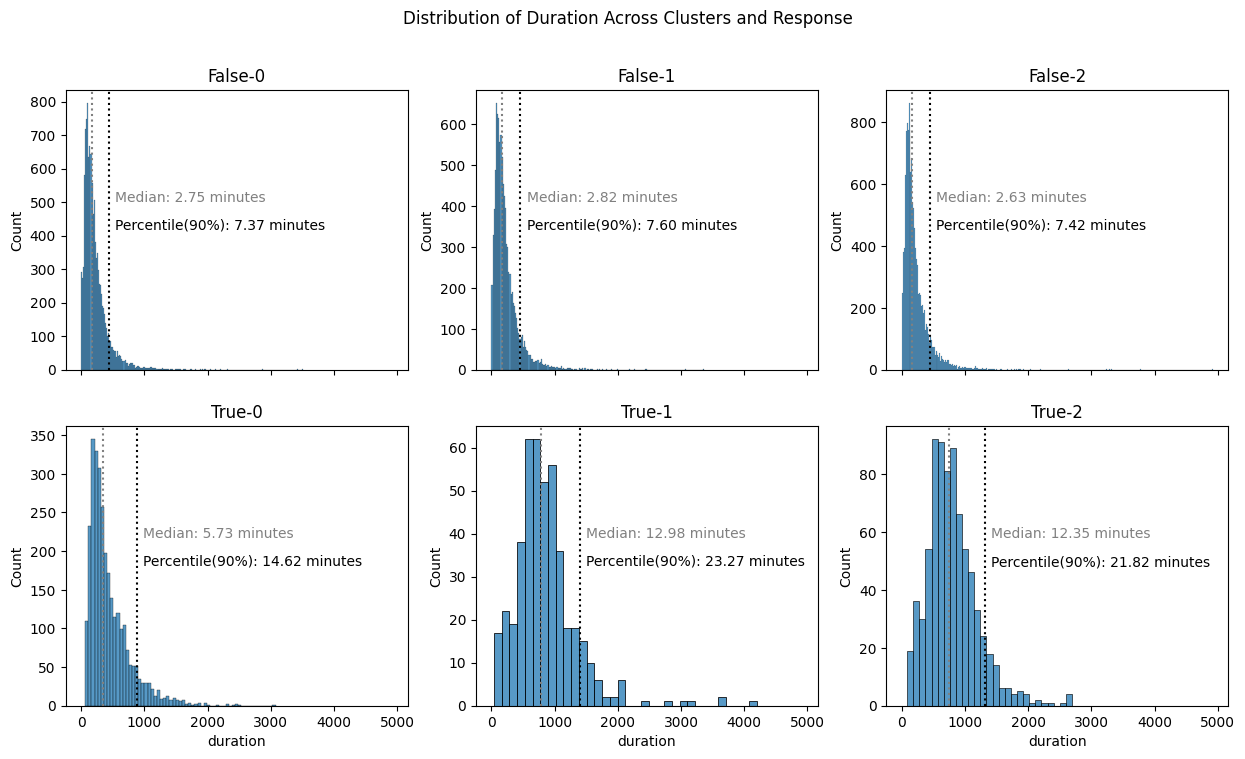

In [44]:
groups = df.groupby(["y", "cluster"])["duration"]

fig, axes = plt.subplots(2, 3, figsize=(15,8), sharex=True)
axes = axes.flatten()
i=0
for lab, group in groups:
    ax=axes[i]
    sns.histplot(group, ax=ax)
    median = np.median(group).astype(int)
    percentile90 = np.quantile(group,.9).astype(int)
    ax.axvline(median, linestyle="dotted", color="gray")
    ax.axvline(percentile90, linestyle="dotted", color="black")
    ax.annotate(f"Median: {median/60:.2f} minutes", 
                (median, ax.get_ylim()[1]*.6), color="gray", xytext= (percentile90+100, ax.get_ylim()[1]*.6))
    ax.annotate(f"\nPercentile(90%): {percentile90/60:.2f} minutes", 
                (median, ax.get_ylim()[1]*.6), color="black", xytext= (percentile90+100, ax.get_ylim()[1]*.5))
    ax.set_title(f"{lab[0]}-{lab[1]}")
    i+=1
plt.suptitle("Distribution of Duration Across Clusters and Response")
plt.show()

- The duration of contact is similar across all clusters for clients who did not subscribe.
- For subscribing clients, the contact duration in cluster 0 follows an exponential distribution, with half of the contacts under 6 minutes and 90% under 15 minutes.
- In cluster 1, half of the contacts are under 13 minutes and 90% are under 24 minutes.
- In cluster 2, half of the contacts are under 13 minutes and 90% are under 22 minutes.

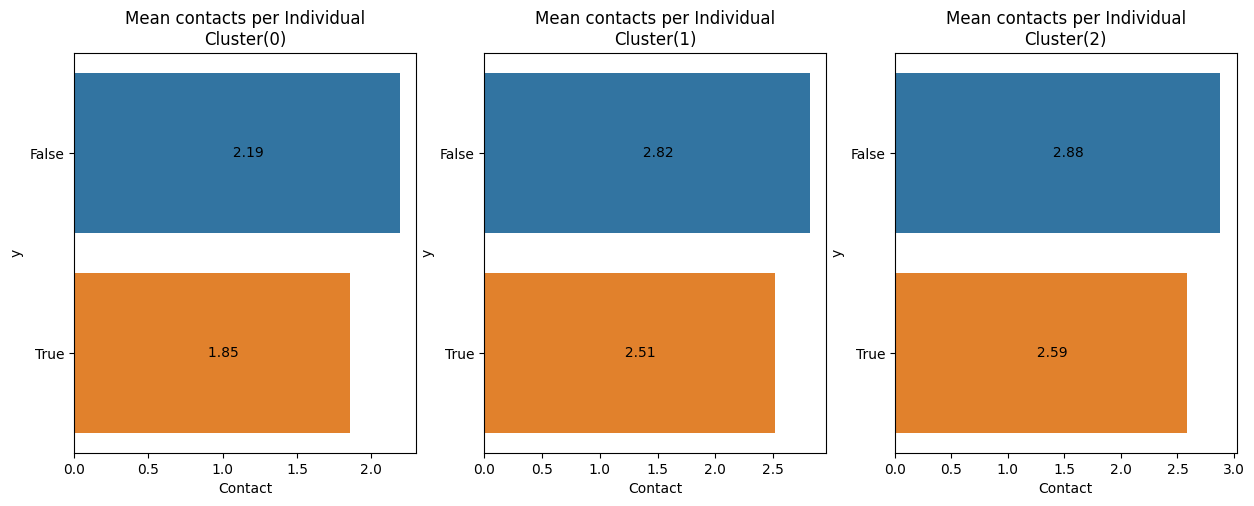

In [45]:
plt.figure(figsize=(15,4))
i=1
mean_contacts = df.groupby(["cluster", "y"])["campaign"].mean().unstack()
for j in range(3):
    ax = plt.subplot(1,3,i)
    sns.barplot(y=mean_contacts.loc[j].index.astype(str), x=mean_contacts.loc[j].values)
    ax.bar_label(ax.containers[0], mean_contacts.loc[j].map(lambda x: f"     {x:.2f}"), label_type ="center")
    ax.set_xlabel(f"Contact")
    ax.set_title(f"Mean contacts per Individual\nCluster({j})")
    i+=1
plt.subplots_adjust(bottom=1, top=2)
plt.show()

- For clients who subscribed, cluster 0 requires fewer contacts compared to cluster 2, and cluster 1 requires fewer contacts than cluster 2.

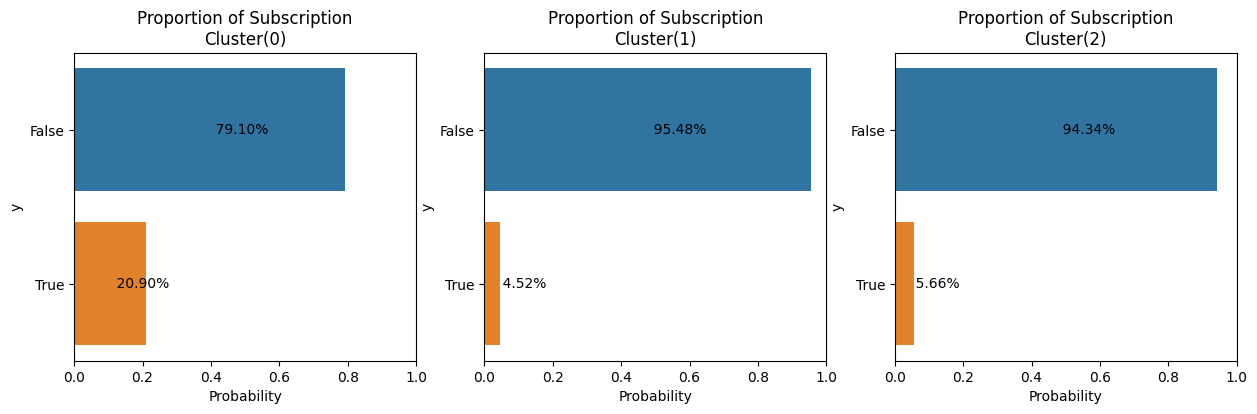

In [46]:
plt.figure(figsize=(15,4))
i=1
proportions = df.groupby("cluster")["y"].value_counts(normalize=True).unstack()
for j in range(3):
    ax = plt.subplot(1,3,i)
    sns.barplot(y=proportions.loc[j].index.astype(str), x=proportions.loc[j].values)
    ax.bar_label(ax.containers[0], proportions.loc[j].map(lambda x: f"               {x:.2%}"), label_type ="center")
    ax.set_xlabel(f"Probability")
    ax.set_title(f"Proportion of Subscription\nCluster({j})")
    ax.set_xlim(0,1)
    i+=1

plt.show()

- The probability of subscribing to a term deposit is 20.9% in cluster 0, 4.5% in cluster 1, and 5.7% in cluster 2.
- Cluster 0 has the highest probability of subscribing to a term deposit, making it the most promising cluster for conversions. In contrast, cluster 1 has the lowest probability, indicating it is the least effective for term deposit subscriptions.

In [47]:
autoencoder.save("final_model.h5")

## Summary Report

#### Cluster Characteristics:

1. Cluster 0:
    - Duration of Contact: For subscribing clients, contact durations are typically shorter, with a median duration of 6 minutes and 90% of contacts under 15 minutes.
    - Mean Contacts: Fewer contacts are required to achieve a subscription compared to other clusters.
    - Subscription Probability: Highest probability of subscribing to a term deposit at 20.9%.

1. Cluster 1:
    - Duration of Contact: Contacts in this cluster have a median duration of 13 minutes and 90% are under 24 minutes.
    - Mean Contacts: Requires more contacts compared to Cluster 0 but fewer than Cluster 2.
    - Subscription Probability: Lowest probability of subscribing to a term deposit at 4.5%.

1. Cluster 2:
    - Duration of Contact: Median duration of 13 minutes and 90% of contacts are under 22 minutes.
    - Mean Contacts: Requires more contacts than Cluster 0 and 1.
    - Subscription Probability: Moderate probability of subscribing to a term deposit at 5.6%.

#### Key Insights:
1. Cluster 0 is the most promising for term deposit subscriptions due to its highest subscription probability and fewer required contacts.
1. Cluster 1 represents the least effective segment for conversions, indicated by the lowest probability and highest contact duration and frequency.
1. Cluster 2 falls in between, with moderate probabilities and contact requirements.

### Recommendations

#### Targeted Marketing:
1. Focus on Cluster 0: Implement targeted campaigns with personalized offers for clients in this cluster to maximize conversion rates. 
    - Use shorter contact durations as a benchmark for effectiveness.
1. Revise Strategies for Cluster 1: Given the low conversion rates and higher contact requirements, reassess the marketing strategies for this segment. Consider testing different approaches or reducing contact attempts.
1. Optimize Efforts for Cluster 2: Apply strategies that balance between cost and effectiveness. Tailor marketing efforts to improve the subscription probability without excessive resource expenditure.
